## Playing and Visualizing Business Foot Traffic Data

In [4]:
import pandas as pd
pd.set_option("display.max.columns", None)

dat = pd.read_csv('2022-05-01.csv')
dat.head()

,Unnamed: 0,PLACEKEY,PARENT_PLACEKEY,SAFEGRAPH_BRAND_IDS,LOCATION_NAME,BRANDS,STORE_ID,TOP_CATEGORY,SUB_CATEGORY,NAICS_CODE,LATITUDE,LONGITUDE,STREET_ADDRESS,CITY,REGION,POSTAL_CODE,OPEN_HOURS,CATEGORY_TAGS,OPENED_ON,CLOSED_ON,TRACKING_CLOSED_SINCE,WEBSITES,GEOMETRY_TYPE,POLYGON_WKT,POLYGON_CLASS,ENCLOSED,PHONE_NUMBER,IS_SYNTHETIC,INCLUDES_PARKING_LOT,ISO_COUNTRY_CODE,WKT_AREA_SQ_METERS,DATE_RANGE_START,DATE_RANGE_END,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,POI_CBG,VISITOR_HOME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_DAYTIME_CBGS,VISITOR_COUNTRY_OF_ORIGIN,DISTANCE_FROM_HOME,MEDIAN_DWELL,BUCKETED_DWELL_TIMES,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,POPULARITY_BY_HOUR,POPULARITY_BY_DAY,DEVICE_TYPE,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,NORMALIZED_VISITS_BY_TOTAL_VISITORS
0,0,23w-222@628-p7v-nh5,NaN,NaN,Any Garment 219 Cleaners,NaN,NaN,Drycleaning and Laundry Services,Drycleaning and Laundry Services (except Coin-...,812320,40.062762,-75.084276,7350 Oxford Ave Ste B,Philadelphia,PA,19111,"{ ""Mon"": [[""7:00"", ""19:00""]], ""Tue"": [[""7:00"",...",NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,POLYGON ((-75.08447700699998 40.06284127300006...,SHARED_POLYGON,False,1.215743e+10,False,False,US,3237.0,2022-05-01 00:00:00.000,2022-06-01 00:00:00.000,604.0,440.0,"[17,23,25,16,22,18,17,16,24,19,22,16,25,18,17,...",4.210103e+11,"{""421010339002"":16,""421010307003"":16,""42101030...","{""42101033900"":30,""42101030800"":28,""4210103380...","{""421010339002"":12,""421010308003"":8,""421010340...","{""US"":439}",2341.0,5.0,"{ ""<5"":472, ""5-20"":88, ""21-60"":17, ""61-240"":19...","{""AutoZone"":235,""Western Union"":138,""Sunoco"":7...","{""Western Union"":414,""Sunoco"":323,""Dunkin'"":29...","[4,3,0,3,0,1,0,12,42,42,42,53,43,69,59,58,57,6...","{""Monday"":100,""Tuesday"":124,""Wednesday"":64,""Th...","{""ios"":240,""android"":200}",9291.0,0.024517,0.026683,0.000050,0.001101
1,1,223-225@628-pmb-87q,NaN,NaN,Parkway Garage 12th and Filbert,NaN,NaN,Other Personal Services,Parking Lots and Garages,812930,39.953239,-75.160116,1201 Filbert St,Philadelphia,PA,19107,"{ ""Mon"": [[""0:00"", ""24:00""]], ""Tue"": [[""0:00"",...",NaN,NaN,NaN,2019-07-01 00:00:00.000,parkwaycorp.com,POLYGON,POLYGON ((-75.16002417282222 39.95337396001809...,OWNED_POLYGON,False,1.215575e+10,False,False,US,410.0,2022-05-01 00:00:00.000,2022-06-01 00:00:00.000,553.0,471.0,"[11,9,15,25,10,14,24,26,7,16,20,29,14,26,15,18...",4.210100e+11,"{""421010005001"":21,""421010002001"":4,""421010103...","{""42101000500"":21,""42045410301"":4,""42101000200...","{""421010005001"":10,""421010002001"":4,""420293001...","{""US"":468,""CA"":4}",50445.0,51.0,"{ ""<5"":399, ""5-20"":17, ""21-60"":47, ""61-240"":62...","{""Starbucks"":365,""Cinnabon"":338,""Santander Ban...","{""Starbucks"":454,""Western Union"":446,""Cinnabon...","[5,2,2,0,3,3,7,18,46,46,22,40,56,76,56,43,60,6...","{""Monday"":58,""Tuesday"":73,""Wednesday"":84,""Thur...","{""ios"":269,""android"":202}",8508.0,0.016834,0.033379,0.000046,0.001008
2,2,zzy-22j@628-pmf-sqz,NaN,NaN,Central Parking Systems,NaN,NaN,Other Personal Services,Parking Lots and Garages,812930,39.950398,-75.167955,1616 Chancellor St,Philadelphia,PA,19103,NaN,NaN,NaN,NaN,2019-07-01 00:00:00.000,NaN,POLYGON,"POLYGON ((-75.1677503213953 39.95050178388545,...",SHARED_POLYGON,False,1.215735e+10,False,False,US,557.0,2022-05-01 00:00:00.000,2022-06-01 00:00:00.000,161.0,108.0,"[3,5,5,4,9,3,4,6,8,6,3,6,13,6,5,6,7,6,9,7,0,1,...",4.210100e+11,"{""421010007002"":7,""421010006001"":4,""4210100080...","{""42101000700"":7,""42101000804"":5,""42101000600""...","{""421010007002"":4}","{""US"":108}",16766.0,195.0,"{ ""<5"":122, ""5-20"":1, ""21-60"":8, ""61-240"":9, ""...","{""Keller Williams"":38,""Farmers Insurance Group...","{""Western Union"":98,""Starbucks"":90,""Dunkin'"":9...","[0,1,1,0,1,4,5,5,23,23,19,21,13,18,19,21,17,12...","{""Mo

In [42]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(dat['LONGITUDE'], dat['LATITUDE'])]

gdat = gpd.GeoDataFrame(dat, geometry=geometry, crs = 'EPSG:4326')

In [22]:
print(gdat.columns)

Index(['Unnamed: 0', 'PLACEKEY', 'PARENT_PLACEKEY', 'SAFEGRAPH_BRAND_IDS',
       'LOCATION_NAME', 'BRANDS', 'STORE_ID', 'TOP_CATEGORY', 'SUB_CATEGORY',
       'NAICS_CODE', 'LATITUDE', 'LONGITUDE', 'STREET_ADDRESS', 'CITY',
       'REGION', 'POSTAL_CODE', 'OPEN_HOURS', 'CATEGORY_TAGS', 'OPENED_ON',
       'CLOSED_ON', 'TRACKING_CLOSED_SINCE', 'WEBSITES', 'GEOMETRY_TYPE',
       'POLYGON_WKT', 'POLYGON_CLASS', 'ENCLOSED', 'PHONE_NUMBER',
       'IS_SYNTHETIC', 'INCLUDES_PARKING_LOT', 'ISO_COUNTRY_CODE',
       'WKT_AREA_SQ_METERS', 'DATE_RANGE_START', 'DATE_RANGE_END',
       'RAW_VISIT_COUNTS', 'RAW_VISITOR_COUNTS', 'VISITS_BY_DAY', 'POI_CBG',
       'VISITOR_HOME_CBGS', 'VISITOR_HOME_AGGREGATION', 'VISITOR_DAYTIME_CBGS',
       'VISITOR_COUNTRY_OF_ORIGIN', 'DISTANCE_FROM_HOME', 'MEDIAN_DWELL',
       'BUCKETED_DWELL_TIMES', 'RELATED_SAME_DAY_BRAND',
       'RELATED_SAME_MONTH_BRAND', 'POPULARITY_BY_HOUR', 'POPULARITY_BY_DAY',
       'DEVICE_TYPE', 'NORMALIZED_VISITS_BY_STATE_SCALING'

In [25]:
import matplotlib.pyplot as plt
import contextily as ctx
import folium
from folium.plugins import HeatMap

center_lat = gdat['LATITUDE'].mean()
center_lon = gdat['LONGITUDE'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12, 
               tiles='CartoDB positron') 

# Prepare heatmap data: [[lat, lon, intensity], ...]
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['RAW_VISIT_COUNTS']]  
             for idx, row in gdat.iterrows() if not pd.isna(row['RAW_VISIT_COUNTS'])]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(m)

In [26]:
m

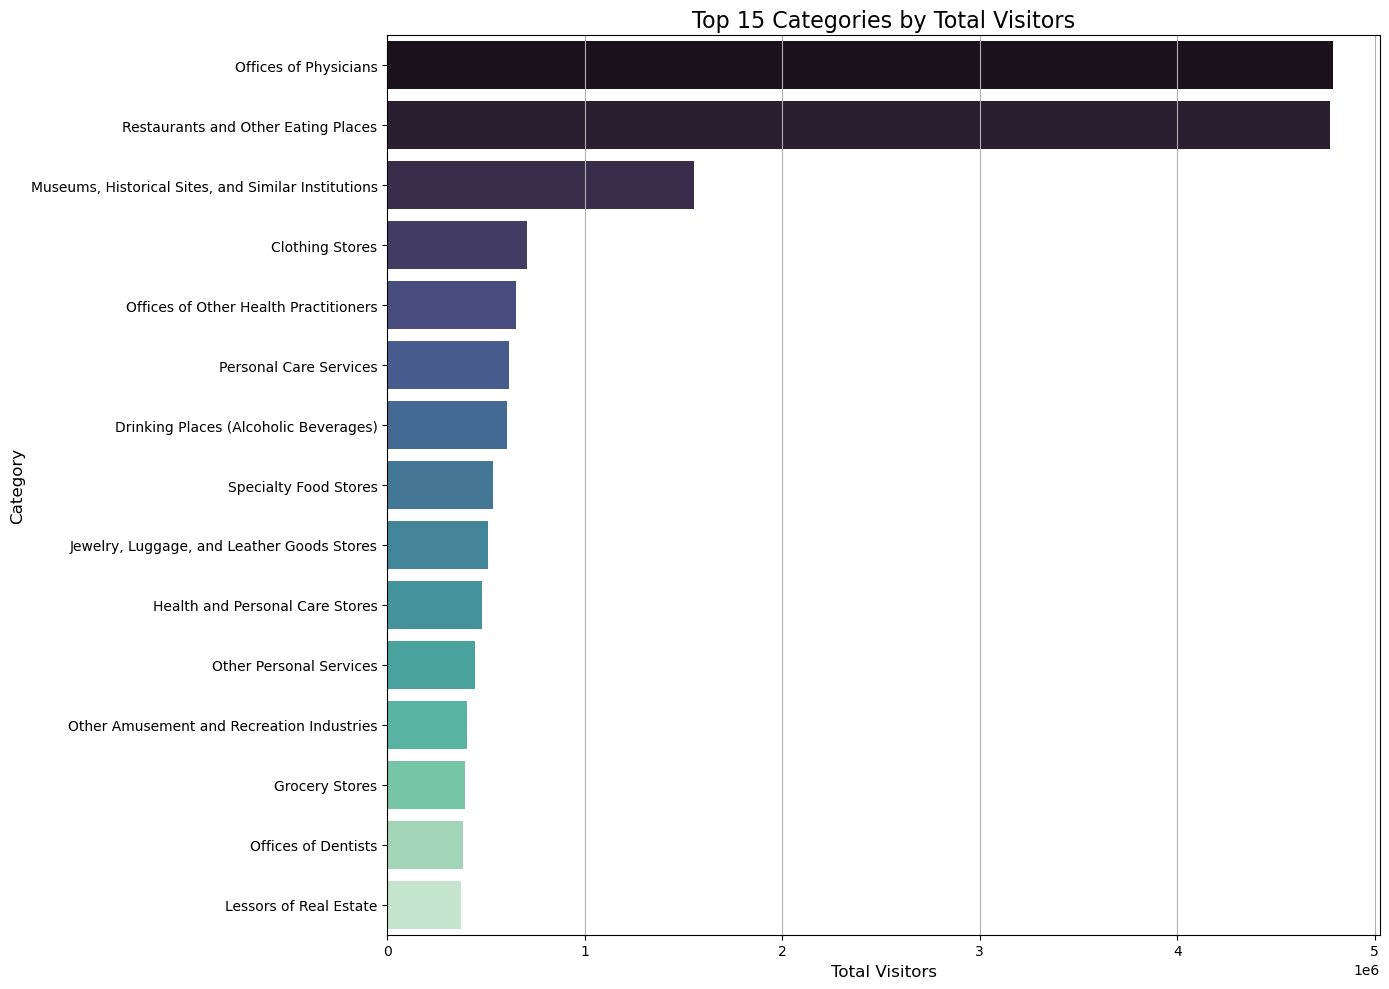

In [47]:
import seaborn as sns

groupdat = dat.groupby('TOP_CATEGORY')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
groupdat = groupdat.sort_values('Total_Visitors', ascending=False).head(15)

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Total_Visitors', y='TOP_CATEGORY', data=groupdat, palette='mako')
plt.title('Top 15 Categories by Total Visitors', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add a grid for better readability
ax.grid(True, axis='x')

# Format y-axis to avoid clipping
plt.tight_layout()
plt.show()

In [40]:
districts = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/1ba5a5d68f4a4c75806e78b1d9245924_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

In [49]:
biz_dist = gpd.sjoin(gdat, districts, how='left', predicate='intersects')
dist_cons = biz_dist.groupby('DISTRICT')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')
dist_cons.head()

,DISTRICT,Total_Visitors
0,1,7537786.0
1,10,919776.0
2,2,6241671.0
3,3,4230957.0
4,4,1887993.0


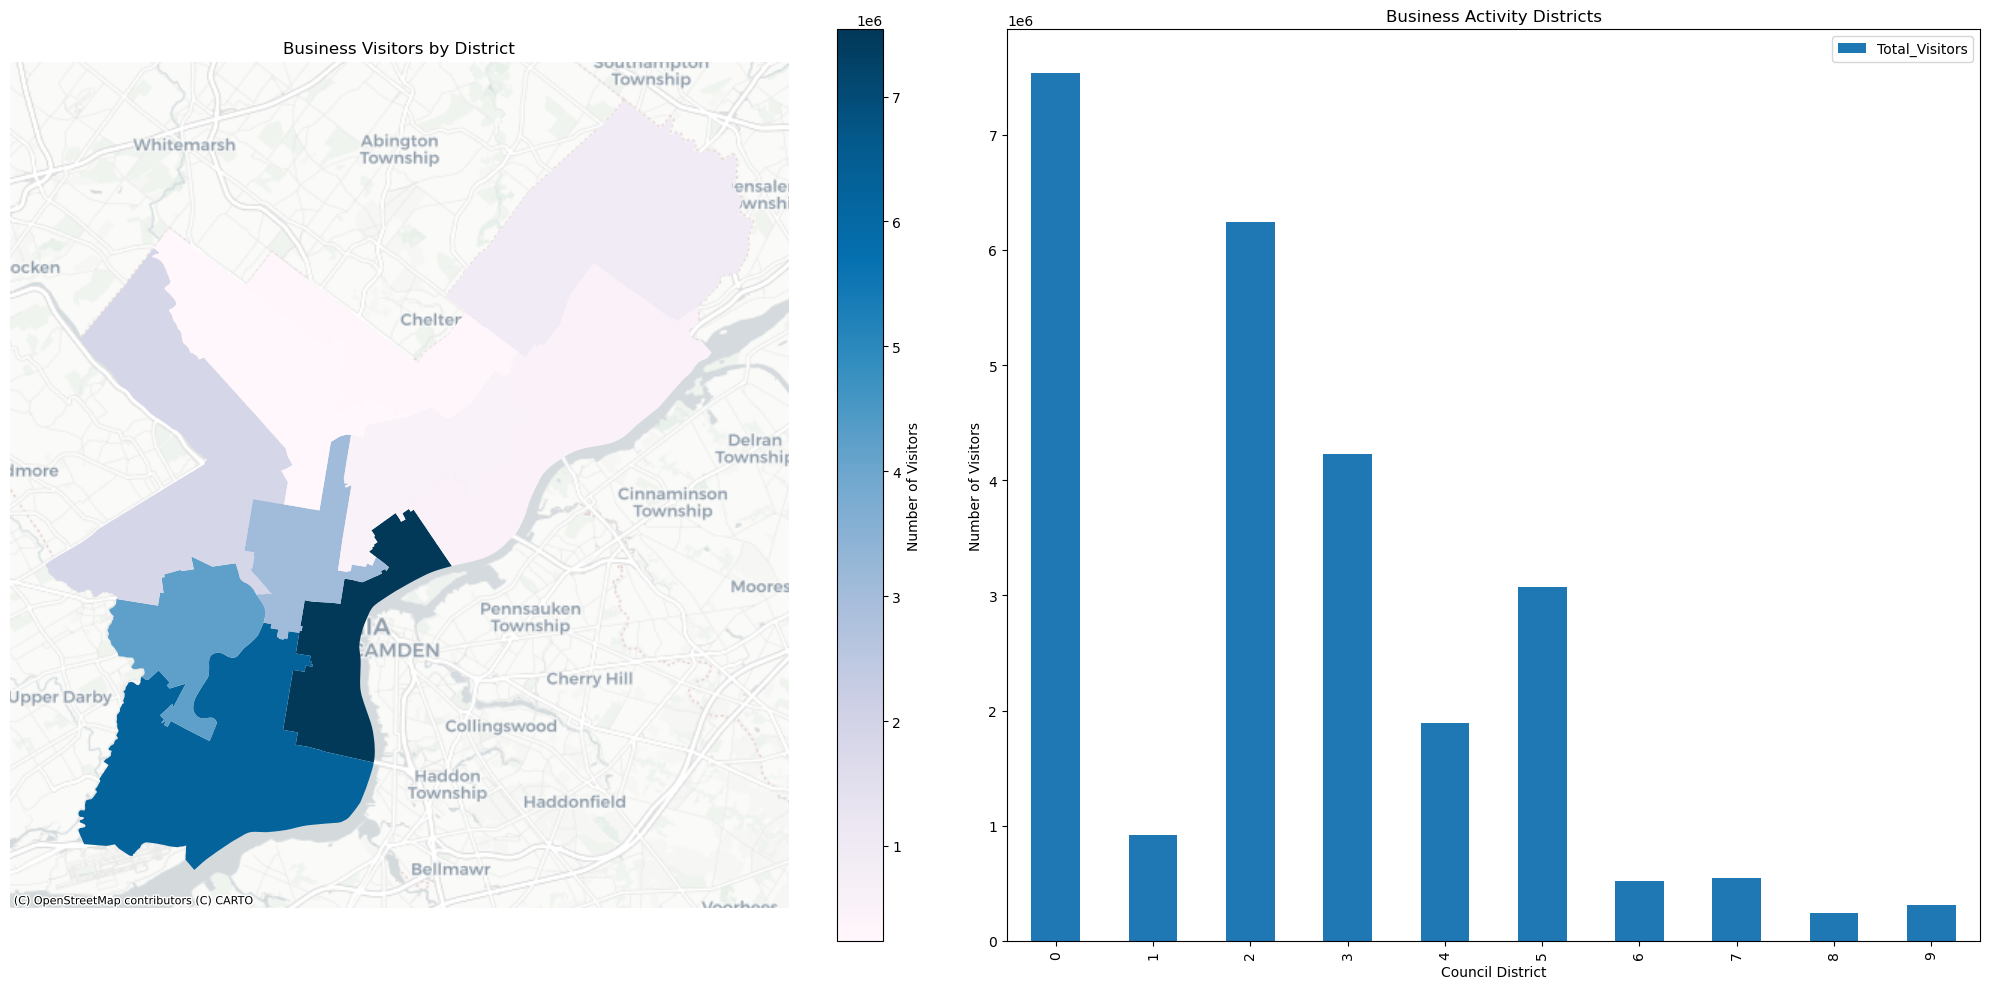

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged_data = districts.merge(dist_cons, on='DISTRICT', how='left')
merged_data = merged_data.to_crs(epsg=3857)
merged_data.plot(column='Total_Visitors', 
                ax=ax1,
                legend=True,
                cmap='PuBu',
                legend_kwds={'label': 'Number of Visitors'},
                missing_kwds={'color': 'lightgrey'})

# Basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()
ax1.set_title('Business Visitors by District')

# Bar chart of change of use permits by district
dist_cons.plot(kind='bar', ax=ax2)
ax2.set_title('Business Activity Districts')
ax2.set_xlabel('Council District')
ax2.set_ylabel('Number of Visitors')

plt.tight_layout()
plt.show()

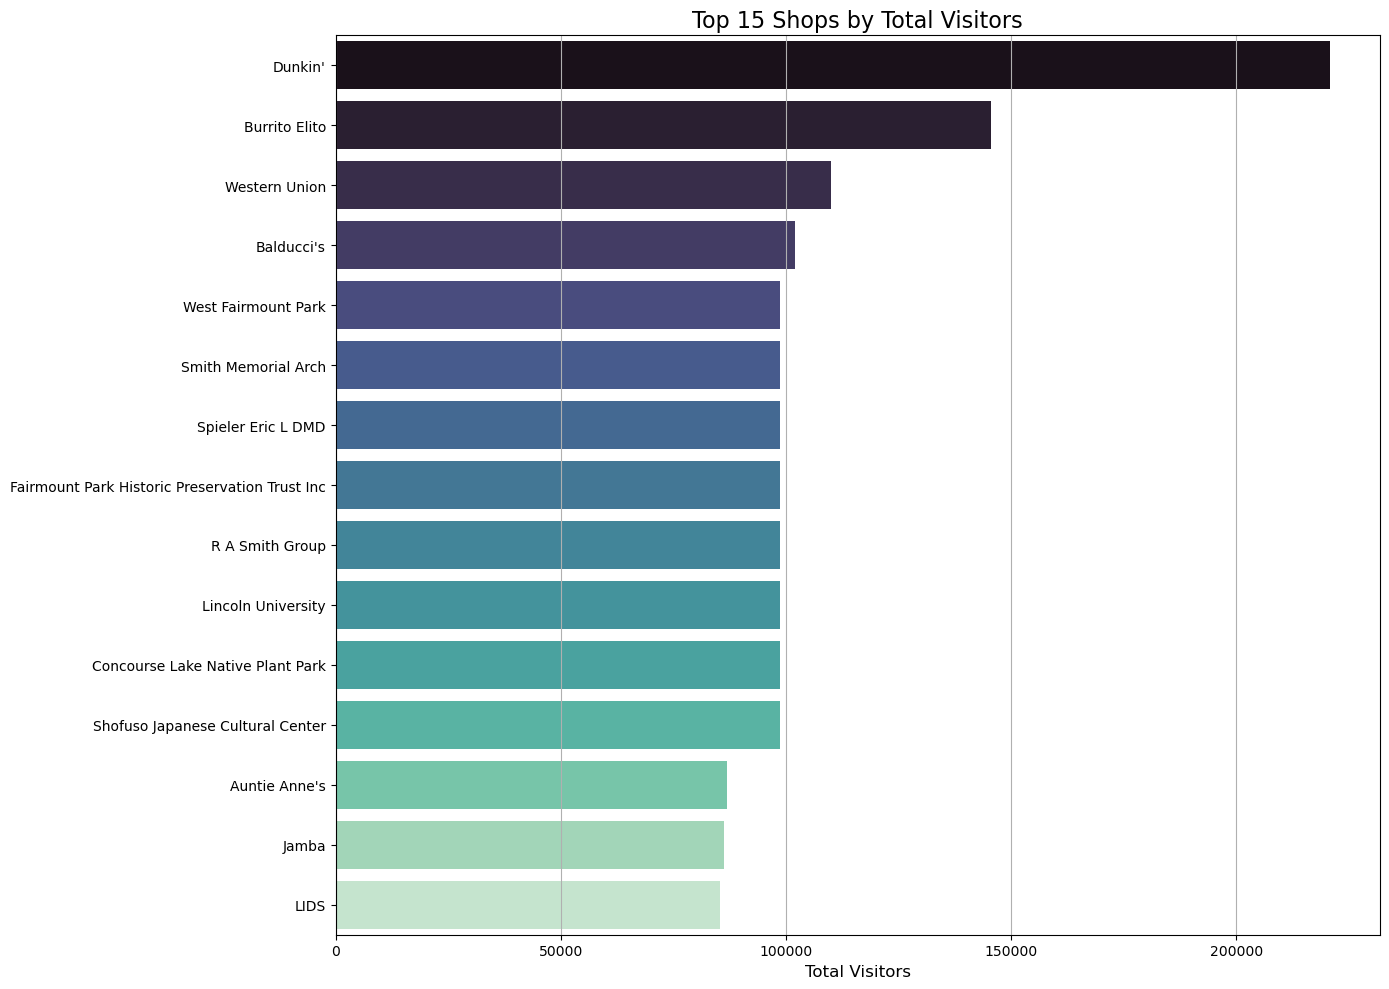

In [57]:
bigbiz = dat.groupby('LOCATION_NAME')['RAW_VISITOR_COUNTS'].sum().reset_index(name='Total_Visitors')

bigbiz = bigbiz.sort_values('Total_Visitors', ascending=False).head(15)

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Total_Visitors', y='LOCATION_NAME', data=bigbiz, palette='mako')
plt.title('Top 15 Shops by Total Visitors', fontsize=16)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel("")

# Add a grid for better readability
ax.grid(True, axis='x')

# Format y-axis to avoid clipping
plt.tight_layout()
plt.show()